<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj21-cats-vs-dogs-image-classification?scriptVersionId=193232732" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Cats vs Dogs : Image Classification</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to tackle the classic binary classification problem of distinguishing between images of cats and dogs using Convolutional Neural Networks (CNNs). By leveraging this image dataset, which consists of two classes—cats and dogs—the goal is to build a robust model capable of accurately classifying images into one of these two categories. This task is a fundamental challenge in computer vision, providing a practical application of CNNs in image recognition and classification. The insights gained from this project can be extended to more complex image classification tasks and further exploration in the field of deep learning.








# **Import Libraries and Data**
---

In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

2024-08-19 20:31:19.433915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 20:31:19.434033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 20:31:19.563376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100%|█████████████████████████████████████████| 218M/218M [00:01<00:00, 183MB/s]
100%|█████████████████████████████████████████| 218M/218M [00:01<00:00, 159MB/s]


# **Data Preparation**
----

In [4]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,)

# test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='reflect',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2  # Reserve 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test_set',
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary'
)

Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


# **Data Exploration**
----

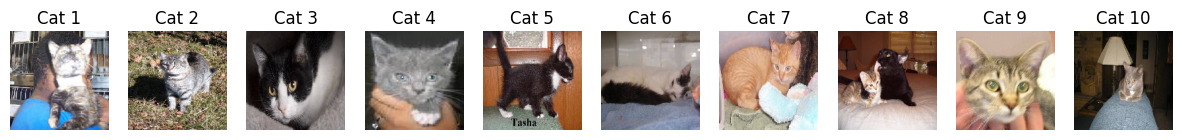

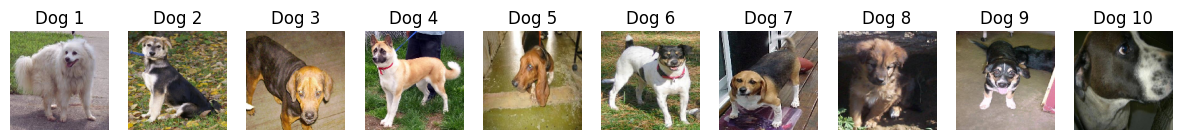

In [7]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

# Set the paths to your image folders
cat_folder = 'training_set/training_set/cats'
dog_folder = 'training_set/training_set/dogs'

# Function to display images
def display_images(folder, title, n_images=10):
    images = os.listdir(folder)[:n_images]
    plt.figure(figsize=(15, 10))
    for i, img_name in enumerate(images):
        img = load_img(os.path.join(folder, img_name), target_size=(150, 150))
        plt.subplot(1, 10, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

# Display 10 cat images
display_images(cat_folder, "Cat")

# Display 10 dog images
display_images(dog_folder, "Dog")


# **Modeling**
----

In [8]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3),padding='same',activation='relu', input_shape = (255,255,3)))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))  
    
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))  

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))  

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))

model.add(Dense(1 , activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,880,961 (64.40 MB)

 Trainable params: 16,880,961 (64.40 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,epochs = 5, validation_data = val_generator, callbacks=[ES,RL],
                    # steps_per_epoch = len(train_generator),# validation_steps = len(val_generaotor)
                    )

Epoch 1/5
  2/201 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2734 - loss: 0.5454   

I0000 00:00:1724099517.908793     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724099517.930104     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9716 - loss: 0.0222

W0000 00:00:1724099608.645838     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


201/201 ━━━━━━━━━━━━━━━━━━━━ 131s 563ms/step - accuracy: 0.9717 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 128s 624ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 118s 572ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 114s 552ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 561ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010


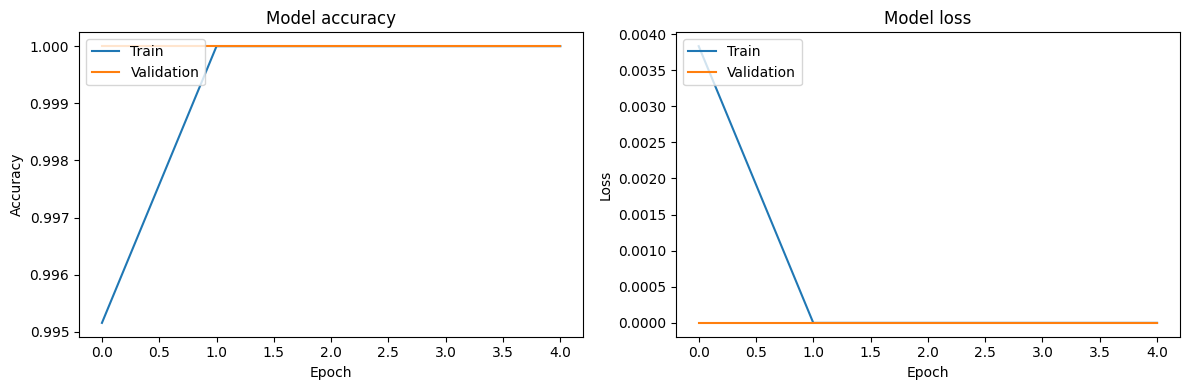

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Prediction**
----

In [13]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = 32, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for test generator
loss,acc = model.evaluate(test_generator,batch_size = 32, verbose = 0)

print('The accuracy of the model for test data is:',acc*100)
print('The Loss of the model for test data is:',loss)

The accuracy of the model for training data is: 100.0
The Loss of the model for training data is: 0.0
The accuracy of the model for test data is: 100.0
The Loss of the model for test data is: 0.0


 5/64 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step

W0000 00:00:1724100208.710495     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step
F1 Score = 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023

    accuracy                           1.00      2023
   macro avg       1.00      1.00      1.00      2023
weighted avg       1.00      1.00      1.00      2023



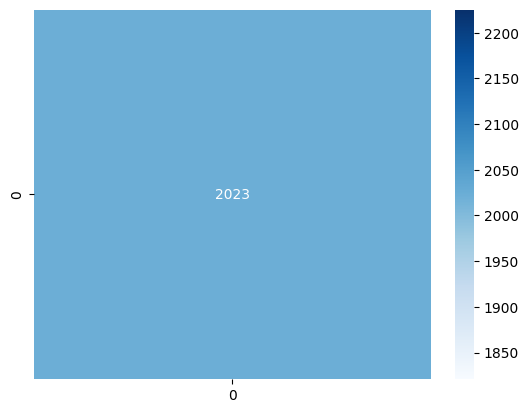

In [14]:
# Generate predictions
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)  # For binary classification
# y_pred = np.argmax(y_pred_prob, axis=1)  # For multi-class classification

# Get true labels
y_test = test_generator.classes

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print(f'F1 Score = {f1:.2f}')

# Print classification report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

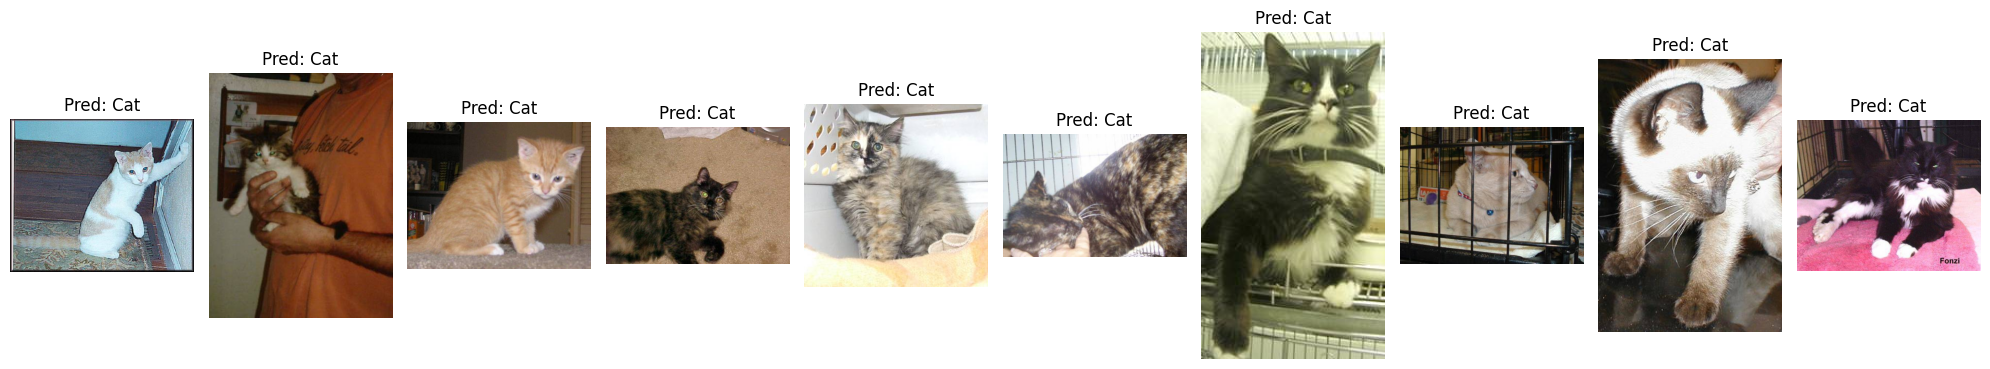

In [15]:
filenames = test_generator.filenames

# Number of images to display
num_images_to_display = 10

# Create a subplot grid
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))

# Display images with predictions
for i in range(num_images_to_display):
    image_path = os.path.join('test_set', filenames[i])
    image = plt.imread(image_path)
    
    axes[i].imshow(image)
    predicted_label = 'Dog' if y_pred[i] == 1 else 'Cat'
    axes[i].set_title(f"Pred: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()